# Bird Species Prediction

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Loading images...

Dataset sizes:
Train: 486 images
Validation: 162 images
Test: 163 images

[INFO] Building model...

[INFO] Training model...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 655ms/step - accuracy: 0.3760 - loss: 1.7486 - val_accuracy: 0.8765 - val_loss: 0.4447 - learning_rate: 1.0000e-04
Epoch 2/20
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.7812 - loss: 0.7072

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7812 - loss: 0.7072 - val_accuracy: 0.8951 - val_loss: 0.4043 - learning_rate: 1.0000e-04
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 509ms/step - accuracy: 0.8641 - loss: 0.4281 - val_accuracy: 0.9444 - val_loss: 0.2024 - learning_rate: 1.0000e-04
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9375 - loss: 0.2134 - val_accuracy: 0.9383 - val_loss: 0.1931 - learning_rate: 1.0000e-04
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 542ms/step - accuracy: 0.9265 - loss: 0.2180 - val_accuracy: 0.9815 - val_loss: 0.0865 - learning_rate: 1.0000e-04
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 0.1996 - val_accuracy: 0.9815 - val_loss: 0.0877 - learning_rate: 1.0000e-04
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 471ms/step - accuracy: 0.9485 - loss: 0.1396 - val_accuracy: 0.9630 - val_loss: 0.0992 - learning_rate: 1.0000e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9688 - loss: 

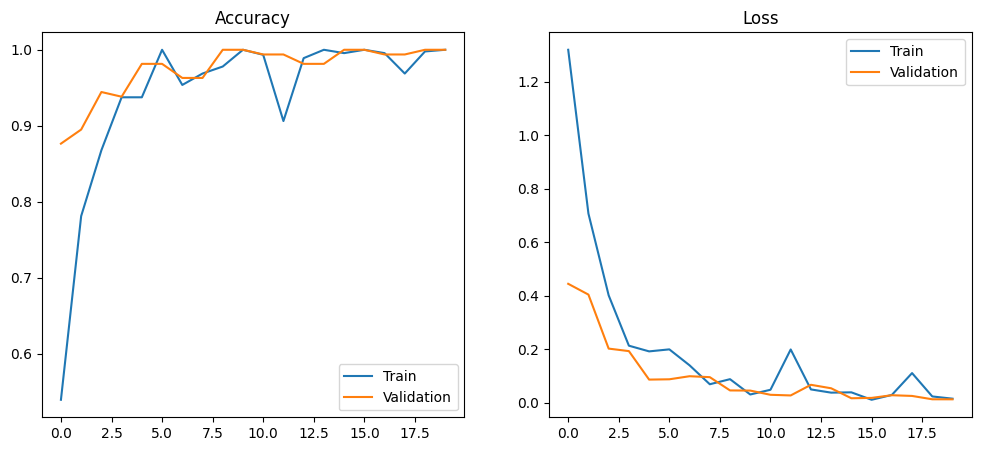


[INFO] Evaluating on test set...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.9962 - loss: 0.0183
Test Accuracy: 99.39%


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step

Classification Report:
                    precision    recall  f1-score   support

AMERICAN GOLDFINCH       1.00      1.00      1.00        27
          BARN OWL       1.00      1.00      1.00        29
 CARMINE BEE-EATER       1.00      1.00      1.00        29
  DOWNY WOODPECKER       0.96      1.00      0.98        23
   EMPEROR PENGUIN       1.00      0.96      0.98        27
          FLAMINGO       1.00      1.00      1.00        28

          accuracy                           0.99       163
         macro avg       0.99      0.99      0.99       163
      weighted avg       0.99      0.99      0.99       163



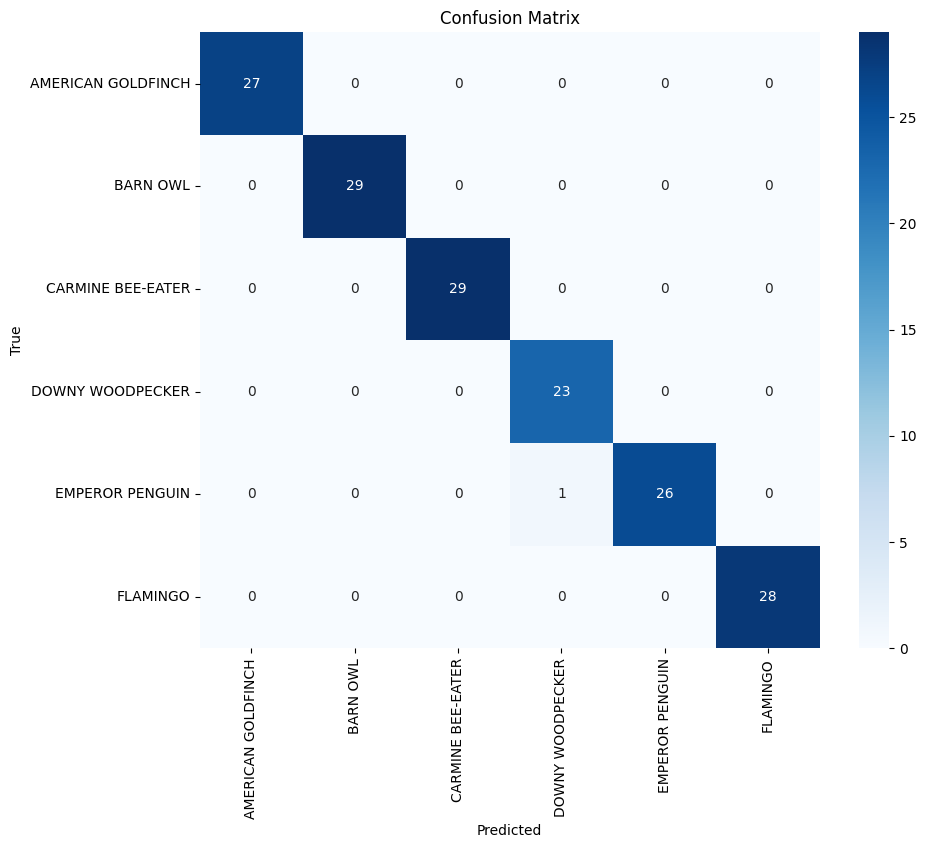


[INFO] Visualizing sample predictions...


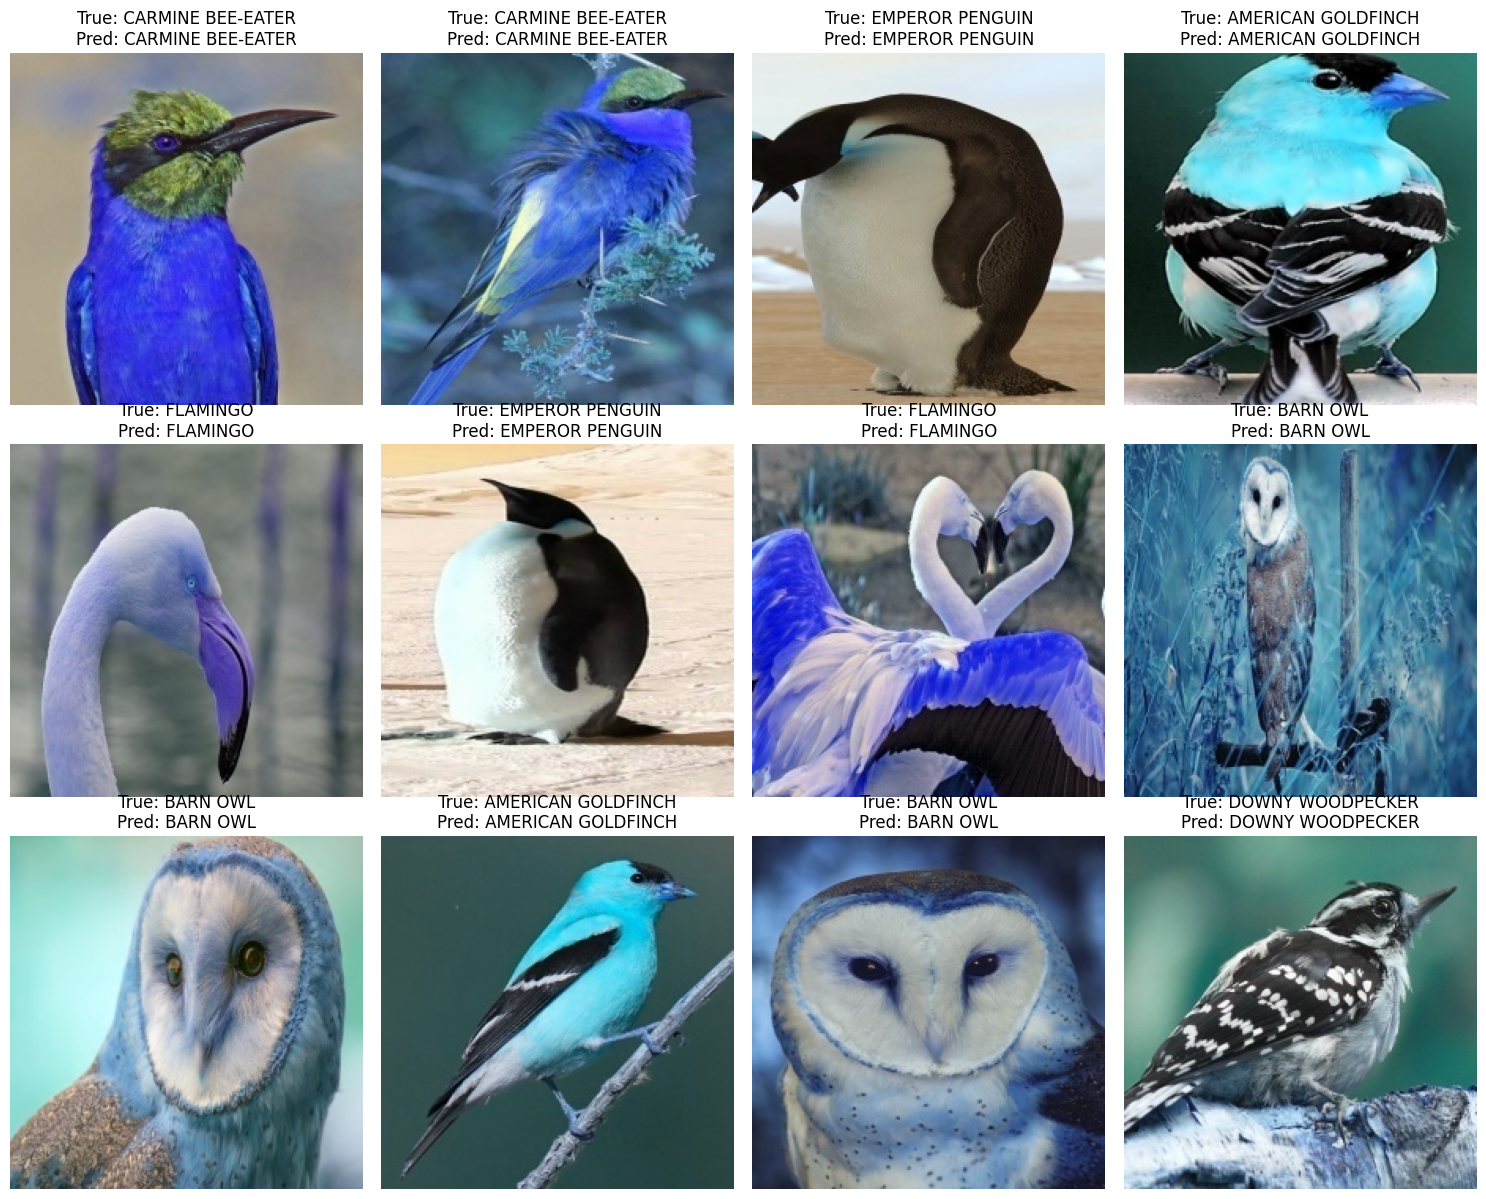


[INFO] Model saved successfully!


Saved artifact at '/tmp/tmp3_l0zury'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  139672420358992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420358224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420360912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420368208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420353040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420361296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420367248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420367632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420365136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139672420362832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1396739275106

In [ ]:
# Import all required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# =============================================
# 1. DATA LOADING AND PREPROCESSING
# =============================================
dataset_path = "/content/drive/My Drive/Collab Code/Data/Bird Speciees Dataset"  # Verify this path!
images = []
labels = []

print("[INFO] Loading images...")
for bird_class in listdir(dataset_path):
    class_path = f"{dataset_path}/{bird_class}"
    for img_file in listdir(class_path)[:200]:  # Limit to 200 images per class
        img = cv2.imread(f"{class_path}/{img_file}")
        if img is not None:
            img = cv2.resize(img, (224, 224))
            images.append(img_to_array(img))
            labels.append(bird_class)
        else:
            print(f"Warning: Could not load {img_file}")

# Convert to numpy arrays and normalize
images = np.array(images, dtype="float32") / 255.0
labels = np.array(labels)

# One-hot encode labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split data (60% train, 20% validation, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f"\nDataset sizes:")
print(f"Train: {len(X_train)} images")
print(f"Validation: {len(X_val)} images")
print(f"Test: {len(X_test)} images")

# =============================================
# 2. DATA AUGMENTATION
# =============================================
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# =============================================
# 3. MODEL BUILDING (VGG16 TRANSFER LEARNING)
# =============================================
print("\n[INFO] Building model...")
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in base_model.layers[:15]:
    layer.trainable = False

# Add custom head
x = Flatten()(base_model.output)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(len(lb.classes_), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# =============================================
# 4. TRAINING
# =============================================
print("\n[INFO] Training model...")
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

# =============================================
# 5. EVALUATION AND TESTING
# =============================================
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

# Evaluate on test set
print("\n[INFO] Evaluating on test set...")
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(
    np.argmax(y_test, axis=1),
    np.argmax(y_pred, axis=1),
    target_names=lb.classes_
))

# Confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_,
            yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# =============================================
# 6. VISUAL TESTING ON MULTIPLE IMAGES
# =============================================
def visualize_predictions(images, true_labels, pred_labels, num_samples=12):
    plt.figure(figsize=(15, 12))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[idx])
        plt.title(f"True: {true_labels[idx]}\nPred: {pred_labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Convert predictions to class names
y_pred_classes = [lb.classes_[i] for i in np.argmax(y_pred, axis=1)]
y_true_classes = [lb.classes_[i] for i in np.argmax(y_test, axis=1)]

print("\n[INFO] Visualizing sample predictions...")
visualize_predictions(X_test, y_true_classes, y_pred_classes)

# =============================================
# 7. SAVE MODEL
# =============================================
model.save("/content/drive/My Drive/bird_species_classifier.h5")
print("\n[INFO] Model saved successfully!")


import tensorflow as tf

# Load your Keras model
model = tf.keras.models.load_model("/content/drive/My Drive/bird_species_classifier.h5")

# Convert to TFLite with int16 quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.int16]  # Force int16 quantization
tflite_model = converter.convert()

# Save the quantized model
quantized_model_path = "/content/drive/My Drive/quantized_int16.tflite"
with open(quantized_model_path, "wb") as f:
    f.write(tflite_model)

print("[SUCCESS] Model quantized to int16 and saved!")

interpreter = tf.lite.Interpreter(model_path="/content/drive/My Drive/quantized_int16.tflite")
interpreter.allocate_tensors()

# Print all tensor details (weights, inputs, outputs)
for tensor in interpreter.get_tensor_details():
    print(f"Name: {tensor['name']}, Dtype: {tensor['dtype']}, Quant: {tensor['quantization']}")

# Check input/output details separately
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

print("\n--- Input Details ---")
print(f"Name: {input_details['name']}, Dtype: {input_details['dtype']}, Shape: {input_details['shape']}")

print("\n--- Output Details ---")
print(f"Name: {output_details['name']}, Dtype: {output_details['dtype']}, Shape: {output_details['shape']}")
